In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from google.colab import drive
#drive.mount('/content/drive')

# Import Data

### Home Brew Dataset

In [69]:
data = pd.read_csv('data_2010.csv')

# remove rows where the Winner is nan
data = data.dropna(subset=['Winner: 0 Home, 1Visiting'])

game_data = data.drop(columns=['Winner: 0 Home, 1Visiting'])
game_results = data['Winner: 0 Home, 1Visiting']

game_data = game_data.fillna(0)

len(game_data)

13620

### Downloaded Dataset
https://github.com/JNoel71/NHL-Game-Prediction-Model/tree/main   'Dataframes/10Cross.csv'

In [60]:
data = pd.read_csv('10Cross.csv')

data = data[data['RegOrOT'] != 'OT']
data = data.drop(['Game_Id','RegOrOT','Away_Team','Home_Team','season','isPlayoff'], axis=1) 
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.fillna(0)

print(data.head())

game_data = data.drop(columns=['Outcome'])
game_results = data['Outcome']
len(game_data)

   Wins  Loses  Goals  GoalsAgainst  GoalsAvg  GoalsAgainstAvg  Goals5v5  \
0     0      0      0             0       0.0              0.0         0   
1     0      0      0             0       0.0              0.0         0   
2     0      0      0             0       0.0              0.0         0   
4     0      0      0             0       0.0              0.0         0   
6     0      0      0             0       0.0              0.0         0   

   GoalsAgainst5v5  Goals5v5Avg  GoalsAgainst5v5Avg  ...  \
0                0          0.0                 0.0  ...   
1                0          0.0                 0.0  ...   
2                0          0.0                 0.0  ...   
4                0          0.0                 0.0  ...   
6                0          0.0                 0.0  ...   

   XGAgainst5v5CloseAvg  PP%  PK%  shRate  svRate  sh%  sv%  PDO%  xG%  \
0                   0.0  0.0  0.0     0.0     0.0  0.0  0.0   0.0  0.0   
1                   0.0  0.0  0.0 

10059

## Correlation HeatMap

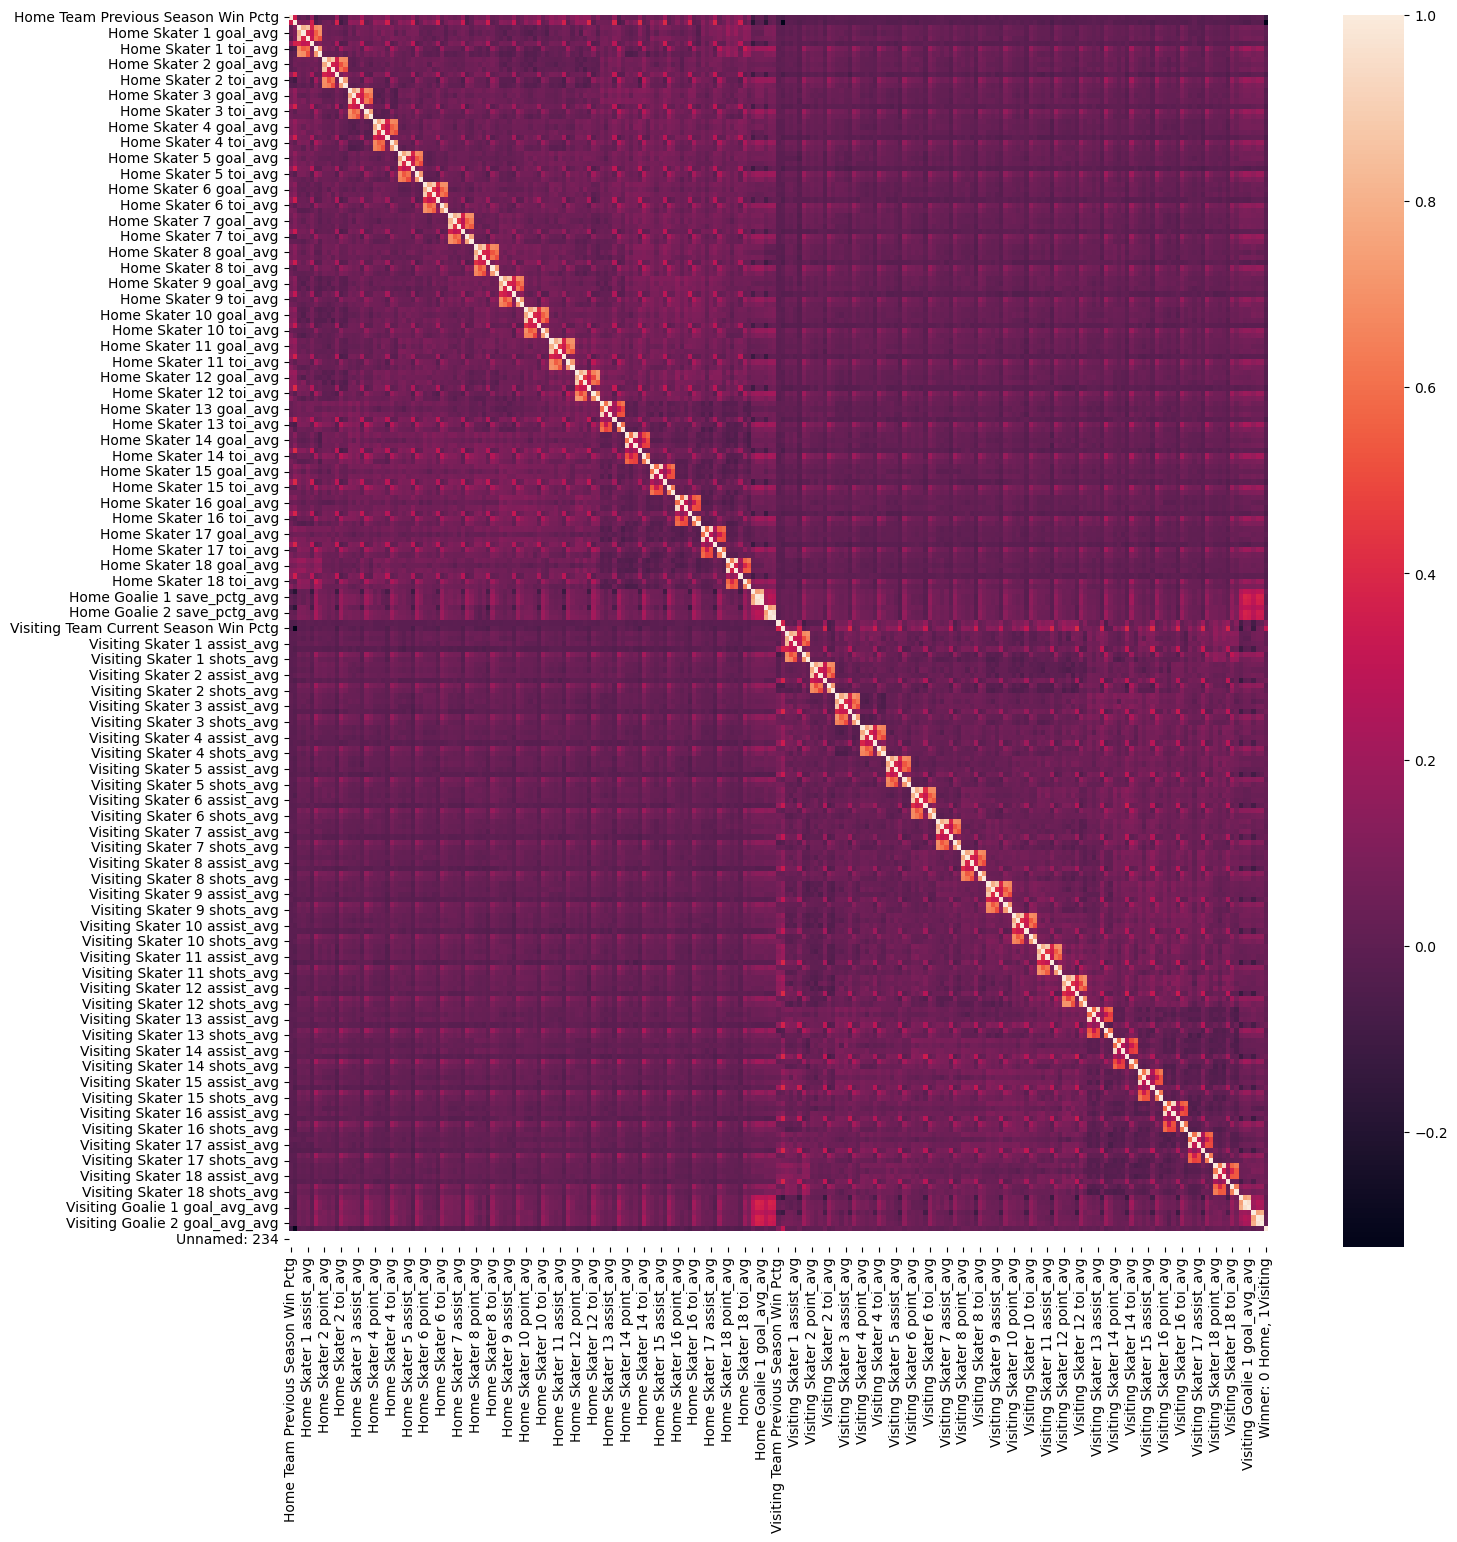

In [64]:
import seaborn as sns

plt.figure(figsize=(16, 16))

# Create a sample DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr = df.corr()

# Create the heatmap
sns.heatmap(corr)
plt.savefig('heatmap_data2010.png', dpi=300, bbox_inches='tight')

# Preprocessing
### Normalize Data

In [70]:
from sklearn.preprocessing import StandardScaler

game_data_scaled = StandardScaler().fit_transform(game_data)

# Check the mean and standard deviation after normalization (for StandardScaler)
print("Mean of normalized training data:", game_data_scaled.mean(axis=0))
print("Standard deviation of normalized training data:", game_data_scaled.std(axis=0))

# For Min-Max, verify the range
print("Min of normalized data:", game_data_scaled.min(axis=0))
print("Max of normalized data:", game_data_scaled.max(axis=0))

Mean of normalized training data: [-1.26509995e-16 -1.01625349e-15  5.21690702e-17  4.38220189e-17
  3.33882049e-17 -2.50411537e-17  2.71279165e-16 -9.59910891e-17
 -1.33552820e-16 -4.59087818e-17  1.87808653e-16 -8.34705123e-18
 -2.32674053e-16  4.43437096e-17 -1.21032243e-16 -1.19988861e-16
 -8.45138937e-17  8.34705123e-18 -2.67105639e-16 -1.41899871e-16
 -5.42558330e-17 -2.23283620e-16  1.12685192e-16 -4.69521632e-18
 -1.30422675e-16  1.08511666e-16  1.08511666e-16  3.33882049e-17
 -1.41899871e-16  1.04338140e-17 -2.25370383e-16 -1.46073396e-16
  7.51234610e-17 -1.75288076e-16  8.34705123e-18  1.04338140e-18
 -1.25205768e-16 -2.50411537e-17  6.67764098e-17  6.26028842e-17
  0.00000000e+00  5.21690702e-18  3.35968812e-16  4.17352561e-18
 -4.17352561e-17  1.50246922e-16 -1.08511666e-16 -8.34705123e-18
 -2.17023332e-16 -1.83635127e-16 -1.33552820e-16 -1.66941025e-17
 -1.66941025e-17 -1.25205768e-17 -2.14936569e-16  2.21196858e-16
 -1.16858717e-16  2.50411537e-17 -4.59087818e-17  0.0000

### Feature Selection using PCA

In [71]:
from sklearn.decomposition import PCA

print(f"Original number of features: {game_data_scaled.shape[1]}")

pca = PCA(n_components=.95)
game_data_transformed = pca.fit_transform(game_data_scaled)

print(f"Reduced number of features: {game_data_transformed.shape[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Number of components: {pca.n_components_}")

Original number of features: 235
Reduced number of features: 143
Explained variance ratio: [0.06623754 0.03616547 0.02911372 0.01910717 0.0185715  0.01825725
 0.01775064 0.01704651 0.01685072 0.01661182 0.016349   0.01597829
 0.01554754 0.01546696 0.01509149 0.01502559 0.01494927 0.01474081
 0.01450129 0.01426799 0.01422878 0.01418785 0.0139401  0.0138283
 0.01362115 0.01349539 0.01324702 0.01321312 0.01302792 0.01283375
 0.01278752 0.01220841 0.01215112 0.01175594 0.01172384 0.01165771
 0.00899504 0.0087043  0.00821397 0.00652511 0.00631975 0.00619612
 0.00615012 0.00467525 0.00452866 0.00437371 0.00434879 0.00426805
 0.00424262 0.00419321 0.00416246 0.0041374  0.00406486 0.003978
 0.00393275 0.00392342 0.00391619 0.00386776 0.00386155 0.00380147
 0.00374431 0.00370682 0.00368515 0.00368002 0.00362645 0.00357343
 0.00355959 0.00354023 0.00351177 0.00349487 0.00345314 0.0034444
 0.00339474 0.00337783 0.00332105 0.00330284 0.00329636 0.00326284
 0.00324053 0.00320733 0.00317611 0.003150

# Split

In [72]:
game_data_train, game_data_test, game_results_train, game_results_test = train_test_split(game_data_transformed, game_results, test_size=0.3,shuffle=True, random_state=252)


# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(game_data_train, game_results_train)

RandomForestClassifier()

## Predict

In [51]:
model.score(game_data_test, game_results_test)

0.5712392312789927

# Neural Network
### Imports

In [44]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 256)                 │          36,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,705 (659.00 KB)

 Trainable params: 168,705 (659.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5898 - loss: 0.6827 - mean_absolute_error: 0.4689 - val_accuracy: 0.6723 - val_loss: 0.5882 - val_mean_absolute_error: 0.4074
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7199 - loss: 0.5320 - mean_absolute_error: 0.3644 - val_accuracy: 0.6791 - val_loss: 0.5818 - val_mean_absolute_error: 0.3831
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7686 - loss: 0.4627 - mean_absolute_error: 0.3148 - val_accuracy: 0.6833 - val_loss: 0.6195 - val_mean_absolute_error: 0.3695
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8349 - loss: 0.3715 - mean_absolute_error: 0.2495 - val_accuracy: 0.6644 - val_loss: 0.6595 - val_mean_absolute_error: 0.3712
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8938 - loss: 0.2597 - mean_absolute_error: 0.1775 - val_accuracy: 0.6361 - val_loss: 0.8293 - val_mean_absolute_error: 0.3769
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 

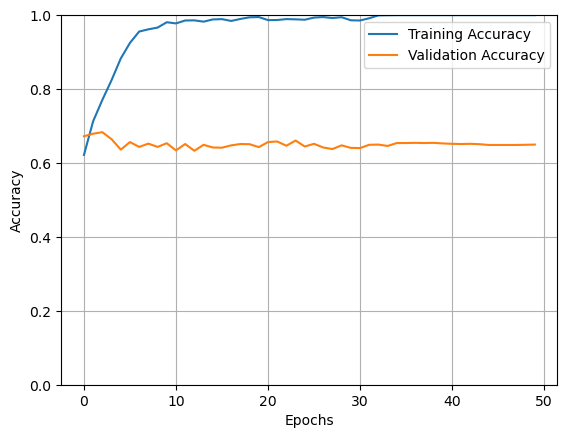

In [74]:
NN_model = tf.keras.Sequential()
NN_model.add(tf.keras.layers.InputLayer(shape=(game_data_train.shape[1],)))
NN_model.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
NN_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

#Fit NN_Model
epochs=50
history = NN_model.fit(game_data_train, game_results_train, validation_split = 0.2, epochs=epochs, batch_size=32)
print(history.history)

predictions = NN_model.evaluate(game_data_test,game_results_test)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()

fig0 = plt.gcf()

fig0.savefig('NN_model_data2010_accuracy.png', dpi=300)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                     │ (None, 256)                 │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,633 (647.00 KB)

 Trainable params: 165,633 (647.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5399 - loss: 0.1963 - mean_absolute_error: 0.4918 - val_accuracy: 0.5926 - val_loss: 0.1693 - val_mean_absolute_error: 0.4792
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7763 - loss: 0.1220 - mean_absolute_error: 0.4235 - val_accuracy: 0.6296 - val_loss: 0.1777 - val_mean_absolute_error: 0.4633
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8724 - loss: 0.0853 - mean_absolute_error: 0.3646 - val_accuracy: 0.6346 - val_loss: 0.2304 - val_mean_absolute_error: 0.4384
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9406 - loss: 0.0489 - mean_absolute_error: 0.2798 - val_accuracy: 0.6074 - val_loss: 0.2686 - val_mean_absolute_error: 0.4440
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9625 - loss: 0.0325 - mean_absolute_error: 0.2243 - val_accuracy: 0.6321 - val_loss: 0.3542 - val_mean_absolute_error: 0.4126
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

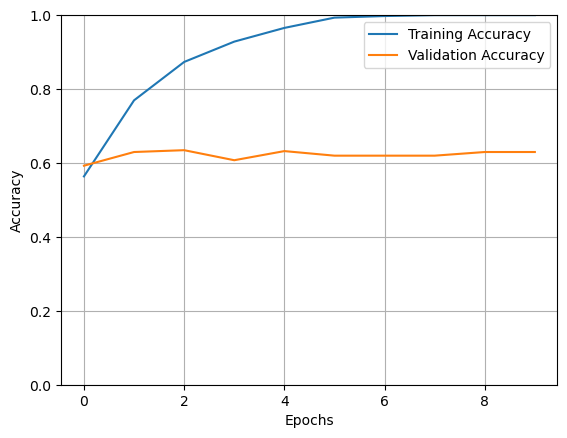

In [176]:
NN_model_binary_focal = tf.keras.Sequential()
NN_model_binary_focal.add(tf.keras.layers.InputLayer(shape=(game_data_train.shape[1],)))
NN_model_binary_focal.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model_binary_focal.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model_binary_focal.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model_binary_focal.add(tf.keras.layers.Dense(1, activation='sigmoid'))
NN_model_binary_focal.compile(optimizer=Adam(learning_rate=0.001),loss='binary_focal_crossentropy', metrics=['mean_absolute_error','accuracy'])
NN_model_binary_focal.summary()

#Fit NN_Model
epochs=50
history = NN_model_binary_focal.fit(game_data_train, game_results_train, validation_split = 0.2, epochs=epochs, batch_size=32)
print(history.history)

predictions = NN_model_binary_focal.evaluate(game_data_test,game_results_test)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()

fig1 = plt.gcf()

fig1.savefig('NN_model_binary_focal_accuracy.png', dpi=300)

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_110 (Dense)                    │ (None, 256)                 │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 165,633 (647.00 KB)

 Trainable params: 165,633 (647.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5549 - loss: 0.7231 - mean_absolute_error: 0.4858 - val_accuracy: 0.5827 - val_loss: 0.6894 - val_mean_absolute_error: 0.4765
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - loss: 0.6293 - mean_absolute_error: 0.4388 - val_accuracy: 0.6296 - val_loss: 0.6673 - val_mean_absolute_error: 0.4312
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7357 - loss: 0.5179 - mean_absolute_error: 0.3627 - val_accuracy: 0.5975 - val_loss: 0.7256 - val_mean_absolute_error: 0.4335
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7989 - loss: 0.4437 - mean_absolute_error: 0.3055 - val_accuracy: 0.6198 - val_loss: 0.7598 - val_mean_absolute_error: 0.4049
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8470 - loss: 0.3372 - mean_absolute_error: 0.2324 - val_accuracy: 0.6049 - val_loss: 0.8014 - val_mean_absolute_error: 0.4016
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

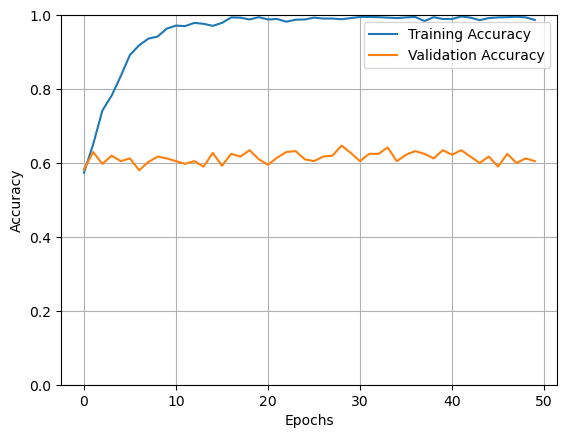

In [184]:
NN_model_dropout = tf.keras.Sequential()
NN_model_dropout.add(tf.keras.layers.InputLayer(shape=(game_data_train.shape[1],)))
NN_model_dropout.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model_dropout.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model_dropout.add(tf.keras.layers.Dropout(0.5))
NN_model_dropout.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model_dropout.add(tf.keras.layers.Dense(1, activation='sigmoid'))
NN_model_dropout.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['mean_absolute_error','accuracy'])
NN_model_dropout.summary()

#Fit NN_Model
epochs=50
history_dropout = NN_model_dropout.fit(game_data_train, game_results_train, validation_split = 0.2, epochs=epochs, batch_size=32)
print(history_dropout.history)

predictions = NN_model_dropout.evaluate(game_data_test,game_results_test)

plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()

fig2 = plt.gcf()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)                    │ (None, 256)                 │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_115 (Dense)                    │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_118 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_119 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_120 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,379,841 (5.26 MB)

 Trainable params: 1,379,841 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5321 - loss: 0.7103 - mean_absolute_error: 0.4952 - val_accuracy: 0.5506 - val_loss: 0.6677 - val_mean_absolute_error: 0.4774
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6831 - loss: 0.6076 - mean_absolute_error: 0.4226 - val_accuracy: 0.6099 - val_loss: 0.6531 - val_mean_absolute_error: 0.4354
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7881 - loss: 0.4739 - mean_absolute_error: 0.3264 - val_accuracy: 0.6198 - val_loss: 0.7204 - val_mean_absolute_error: 0.4177
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8682 - loss: 0.3101 - mean_absolute_error: 0.1996 - val_accuracy: 0.6123 - val_loss: 1.0038 - val_mean_absolute_error: 0.4029
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9317 - loss: 0.1954 - mean_absolute_error: 0.1176 - val_accuracy: 0.6222 - val_loss: 1.2030 - val_mean_absolute_error: 0.3893
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms

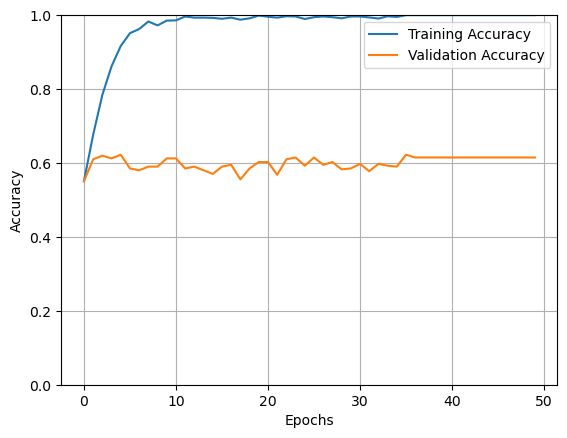

In [185]:
NN_model_large = tf.keras.Sequential()
NN_model_large.add(tf.keras.layers.InputLayer(shape=(game_data_train.shape[1],)))
NN_model_large.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model_large.add(tf.keras.layers.Dense(512, activation='relu'))
NN_model_large.add(tf.keras.layers.Dense(1024, activation='relu'))
NN_model_large.add(tf.keras.layers.Dense(512, activation='relu'))
NN_model_large.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model_large.add(tf.keras.layers.Dense(128, activation='relu'))
NN_model_large.add(tf.keras.layers.Dense(1, activation='sigmoid'))
NN_model_large.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['mean_absolute_error','accuracy'])
NN_model_large.summary()

#Fit NN_Model
epochs=50
history_dropout = NN_model_large.fit(game_data_train, game_results_train, validation_split = 0.2, epochs=epochs, batch_size=32)
print(history_dropout.history)

predictions = NN_model_large.evaluate(game_data_test,game_results_test)

plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()

fig3 = plt.gcf()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)                    │ (None, 256)                 │          36,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_130 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,705 (659.00 KB)

 Trainable params: 168,705 (659.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5812 - loss: 0.6693 - mean_absolute_error: 0.4628 - val_accuracy: 0.6565 - val_loss: 0.6007 - val_mean_absolute_error: 0.4276
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7229 - loss: 0.5430 - mean_absolute_error: 0.3759 - val_accuracy: 0.6728 - val_loss: 0.5886 - val_mean_absolute_error: 0.4088
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7884 - loss: 0.4528 - mean_absolute_error: 0.3103 - val_accuracy: 0.6623 - val_loss: 0.6745 - val_mean_absolute_error: 0.3837
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8266 - loss: 0.3788 - mean_absolute_error: 0.2580 - val_accuracy: 0.6576 - val_loss: 0.7129 - val_mean_absolute_error: 0.3778
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8883 - loss: 0.2595 - mean_absolute_error: 0.1768 - val_accuracy: 0.6565 - val_loss: 0.8479 - val_mean_absolute_error: 0.3661
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 

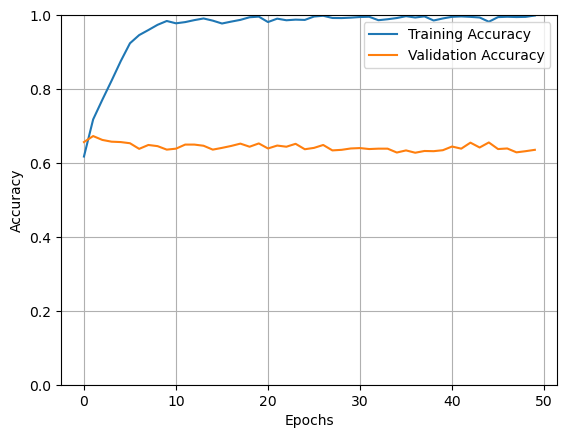

In [212]:
NN_model2 = tf.keras.Sequential()
NN_model2.add(tf.keras.layers.InputLayer(shape=(game_data_train.shape[1],)))
NN_model2.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model2.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model2.add(tf.keras.layers.Dense(256, activation='relu'))
NN_model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
NN_model2.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['mean_absolute_error','accuracy'])
NN_model2.summary()

#Fit NN_Model
epochs=50
history = NN_model2.fit(game_data_train, game_results_train, validation_split = 0.2, epochs=epochs, batch_size=32)
print(history.history)

NN_model2.evaluate(game_data_test,game_results_test)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.legend()

fig4 = plt.gcf()

#  fig1.savefig('softmax_accuracy.png', dpi=300)